In [119]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

#####
# custom functions
#####
import etl
from function import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [61]:
df_set = etl.etl('competition_data')
print df_set.shape
Y_KEY = 'cost'

(30213, 51)


In [57]:
df_set.head()

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,...,quantity_8,end_a_forming,end_x_forming,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,...,NaN,Yes,Yes,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,...,NaN,Yes,Yes,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,...,NaN,Yes,Yes,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,...,NaN,Yes,Yes,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,...,NaN,Yes,Yes,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [120]:
from sklearn import cross_validation

df_train, df_test = cross_validation.train_test_split(df_set)
df_train_x = df_train.drop(Y_KEY, 1)
df_train_y = df_train[Y_KEY]
# Testing
df_test_x = df_test.drop(Y_KEY, 1)
df_test_y = df_test[Y_KEY]
print len(df_train)
print len(df_test)

22659
7554


# Overview Analysis of the ETL output

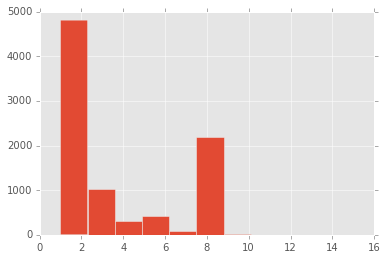

In [67]:
# What's the distribution of tube assembly id across the training set? 
df_set.groupby('tube_assembly_id').size().hist()

In [72]:
# What's the distribution of price bracketing?
df_set.groupby('bracket_pricing').count()
# most of it is bracket pricing

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,...,component_id_8,quantity_8,end_a_forming,end_x_forming,supplier,quote_date,annual_usage,min_order_quantity,quantity,cost
bracket_pricing,,,,,,,,,,,,,,,,,,,,,
No,3930,3869,3930,3930,3930,3930,3930,3930,3930,3930,...,0,0,3673,3556,3930,3930,3930,3930,3930,3930
Yes,26283,26115,26283,26283,26283,26283,26283,26283,26283,26283,...,3,3,25614,25342,26283,26283,26283,26283,26283,26283


# Playing with visualization 

In [104]:
from sklearn import decomposition
pca = decomposition.PCA()
x = df_train_x._get_numeric_data().fillna(0)
red_x = pca.fit_transform(x)
pca.explained_variance_


,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8,annual_usage,min_order_quantity,quantity
1268,19.05,2.11,101,3,50.80,0,0,0,1,1,1,0,0,0,0,0,0,0,50
20549,9.52,0.89,72,5,19.05,0,0,0,2,2,0,0,0,0,0,0,2,0,3
5669,9.52,0.71,15,2,19.05,0,0,0,2,2,0,0,0,0,0,0,1,0,1
18827,9.52,0.89,68,2,127.00,0,0,0,1,1,0,0,0,0,0,0,2,0,1
20322,101.60,1.65,174,3,152.40,0,0,0,0,0,0,0,0,0,0,0,5,0,1


In [121]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(x, df_train_y)
test_x = df_test_x._get_numeric_data().fillna(0)
y_pred = lm.predict(test_x)
print y_pred
print df_test_y
print metric(y_pred, df_test_y)

[ 12.23808911  13.48860305  13.88915927 ...,  13.77632632  14.25281383
  14.12181133]
27636     4.467987
27632     6.599044
23753     5.425015
2302      5.731042
11441    12.018495
11348    21.644419
24548     2.542802
29043     2.328583
15581     2.114365
22183    12.043534
5814      4.064588
30148    11.868264
18716    14.283091
28480     4.790706
25422    22.342716
8304      9.364411
16655     3.140945
28023     3.104778
10810     5.722695
7490      8.015112
30211    18.214141
3759      7.094251
19716    36.942962
8789      5.928568
20208    25.853675
6033      9.122372
15920     5.845106
18219     2.631828
29249     5.661490
6006      6.304146
           ...    
5118     12.338432
8672      3.764126
4333     10.068272
27991     4.264897
24147     1.633069
27839    21.282752
3372      3.046355
6916      4.234294
26708     2.615136
5697     14.572425
27749     7.091469
29673    18.542424
17160     2.208955
15480     9.005525
19325     2.136621
24856    24.651825
10196     5.583593
57